# Analyze Received Long Multi Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [4]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
format free
pkg load signal

Last updated: Saturday 11 January 2020 UTC

In [5]:
inputFilename = "/mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav"

inputFilename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav


In [6]:
audioinfo(inputFilename)

ans =

  scalar structure containing the fields:

    Filename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav
    CompressionMethod = 
    NumChannels = 2
    SampleRate = 62500
    TotalSamples = 1.40625e+07
    Duration = 225
    BitsPerSample = -1
    BitRate = -1
    Title = 
    Artist = 
    Comment = 



In [7]:
[SamplesIQRV, sampleRate] = audioread(inputFilename);
size(SamplesIQRV)
sampleRate

ans =

 1.40625e+07 2


sampleRate = 62500


In [8]:
SamplesRV=SamplesIQRV(:,1)+i*SamplesIQRV(:,2);
size(SamplesRV)

ans =

 1.40625e+07 1




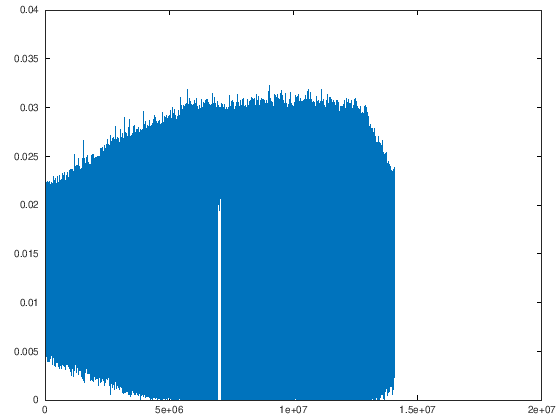

In [9]:
plot(abs(SamplesRV));

In [10]:
numPeriods = rows(SamplesRV)/sampleRate;
period = numPeriods;
TshortRV = [0:1/sampleRate:1](:);
TfullRV = [0:1/sampleRate:period](:);

In [11]:
RaisedCosineRV = (1 - cos(2*pi*TshortRV))/2;
size(RaisedCosineRV)

ans =

 62501 1




In [12]:
SigSec0RV = SamplesRV(1:rows(RaisedCosineRV)) .* RaisedCosineRV;
size(SigSec0RV)

ans =

 62501 1




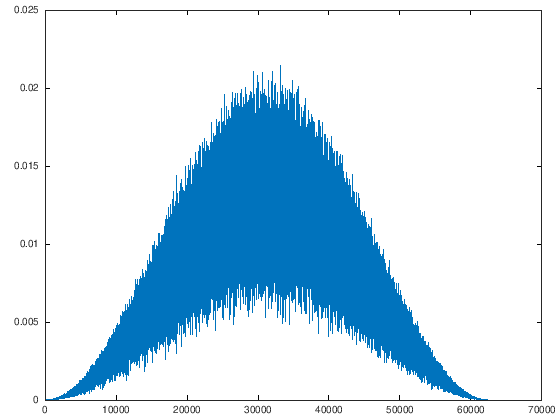

In [13]:
plot(abs(SigSec0RV));

In [16]:
FftSec0RV = abs(fft(SigSec0RV, sampleRate*10 + 1));
FreqSec0RV = [linspace(-sampleRate/2, sampleRate/2, rows(FftSec0RV))](:);

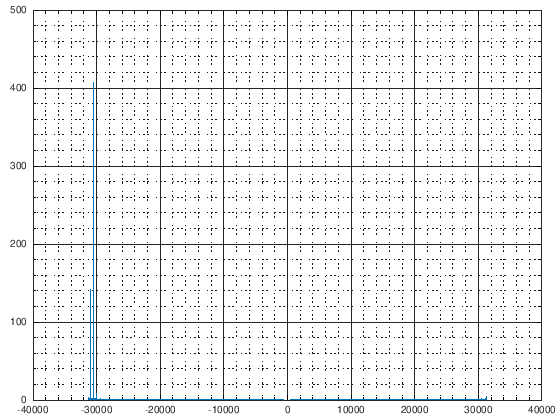

In [17]:
plot(FreqSec0RV, FftSec0RV)
grid on
grid minor
# axis([-760 -750], "tic")

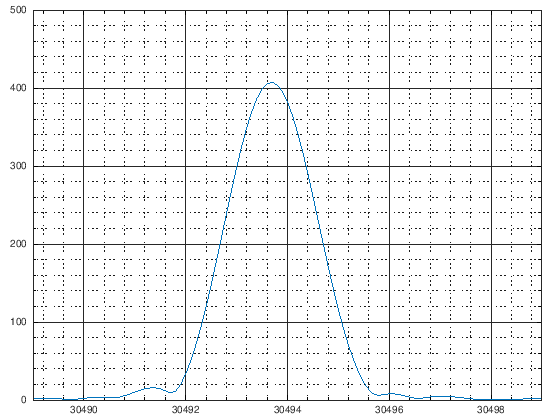

In [14]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([30494-5 30494+5], "tic")

In [15]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = 30493.7


In [16]:
find(E_cos_pulse(:) == max(E_cos_pulse))

ans = 617438


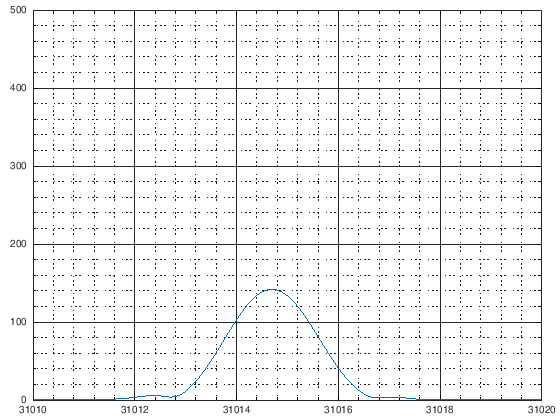

In [17]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([31015-5 31015+5], "tic")

In [18]:
find(F_base(:) == 30498)

ans = 617481


In [19]:
find(F_base(:) == 28724)

ans = 599741


In [20]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(617481:end))))

ans = 31014.7


In [21]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(617481:end)))) - ...
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = 521


In [22]:
721 - 521

ans = 200


In [23]:
fracSeconds = 1;
indexIncr = (columns(Tshort)-1)/fracSeconds;
Freqs = [];
for startIndex = 1:indexIncr:rows(z)-columns(RC)-1
  time = T(startIndex)
  SigLoopRV = z(startIndex:startIndex+columns(RC)-1)' .* RC;
  FftLoopRV = fft(SigLoopRV, sampleRate*10 + 1);
  FftLoopAbsRV = abs(FftLoopRV);
  FftLoopPolCV = cart2pol(real(FftLoopRV), imag(FftLoopRV)); # rows of [theta, r]
  FreqLoopRV = linspace(-sampleRate/2, sampleRate/2, columns(FftLoopRV));
  freqMaxPeak = FreqLoopRV(find(FftLoopAbsRV(:) == max(FftLoopAbsRV)))
  [PeaksCV idxPeaksCV] = findpeaks(FftLoopPolCV(:,2), "MinPeakHeight", 50);
  # size(PeaksCV)
  # size(idxPeaksCV)
  PeaksCV
  FreqLoopRV(idxPeaksCV)
endfor

freq = 30493.7
ans =

 30493.7 31014.7


time = 0
freq = 30494.1
ans =

 30494.1 31015.1


time = 1
freq = 30494.5
ans =

 30494.5 31015.4


time = 2
freq = 30494.9
ans =

 30494.9 31008.9


time = 3
freq = 30495.4
ans =

 30495.4 31009.4


time = 4
freq = 30495.8
ans =

 30495.8 31009.8


time = 5
freq = 30496.2
ans =

 30496.2 31003.3


time = 6
freq = 30496.6
ans =

 30496.6 31003.7


time = 7
freq = 30497.1
ans =

 30497.1 31004


time = 8
freq = 30497.5
ans =

 30497.5 30996.5


time = 9
freq = 30498
ans =

 30498 30997


time = 10
freq = 30498.3
ans =

 30498.3 30997.3


time = 11
freq = 30498.9
ans =

 30498.9 30989.9


time = 12
freq = 30499.3
ans =

 30499.3 30990.3


time = 13
freq = 30499.7
ans =

 30499.7 30990.7


time = 14
freq = 30500.1
ans =

 30500.1 30983.1


time = 15
freq = 30500.5
ans =

 30500.5 30983.6


time = 16
freq = 30501
ans =

 30501 30984


time = 17
freq = 30501.5
ans =

 30501.5 30976.5


time = 18
freq = 30501.9
ans =

 30501.9 30977


time = 19
freq =